In [1]:
import numpy as np
import matplotlib.pylab as plt
import os, glob, math, sys, subprocess


In [80]:
# dictionary with input parameters to feed to c++ executable

pars = {
'executable' : "./neural_network",
'train_size' : 1000,
'batch_size' : 10,
'epochs' : 30,
'Lambda' : 10.0,
'eta' : 0.5,
'monitor_cost' : 0,
'print_cost' : 1,
'verbose' : 0,
'monitor_accuracy' : 0, 
'print_accuracy' : 1,
'train_label_output' : "prova",
'Layers': [784,30,10] ,
'train' : 1,
'save_weights' : 0,
'load_weights' : 0,
'test_NN' : 1,
'cross_validate' : 1,
'test_size' :1000,
'test_label_output' : 'output_prova.txt'
}


In [81]:
# transforming the dictionary in a list and each element in the list into a string
def convert_pars():
    par_list =[]
    par_list.append(pars['executable'])
    par_list.append(pars['train_size'])
    par_list.append(pars['batch_size'])
    par_list.append(pars['epochs'])
    par_list.append(pars['Lambda'])
    par_list.append(pars['eta'])
    par_list.append(pars['monitor_cost'])
    par_list.append(pars['print_cost'])
    par_list.append(pars['verbose'])
    par_list.append(pars['monitor_accuracy'])
    par_list.append(pars['print_accuracy'])
    par_list.append(pars['train_label_output'])
    par_list.append(len(pars['Layers']))
    [par_list.append(x) for x in pars['Layers']]
    par_list.append(pars['train'])
    par_list.append(pars['save_weights'])
    par_list.append(pars['load_weights'])
    par_list.append(pars['test_NN'])
    par_list.append(pars['cross_validate'])
    par_list.append(pars['test_size'])
    par_list.append(pars['test_label_output'])
    return [str(x) for x in par_list]

In [45]:
# calling the execution of neural_network, this is a first try
subprocess.call(final_list)

0

In [82]:
for size in range(100,1100,100):
    pars['train_size'] = size
    pars['train_label_output'] = '{:04}'.format(size)
    par_list = convert_pars()
    subprocess.call(par_list)

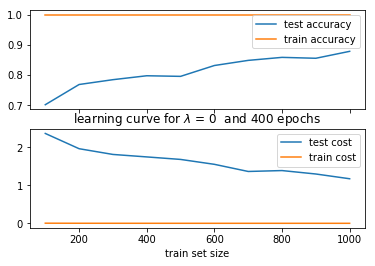

In [86]:
fig, ax =plt.subplots(2,1, sharex = True)
a,c = np.genfromtxt(pars['test_label_output'],unpack=True)
ax[0].plot(range(100,1100,100), a, label = 'test accuracy')
ax[1].plot(range(100,1100,100),c, label = 'test cost')

train_a = []
train_c = []
for size in range(100,1100,100):
    e,a,c = np.genfromtxt("train_output_{:04d}".format(size), unpack = True)
    train_a.append(a[-1])
    train_c.append(c[-1])
ax[0].plot(range(100,1100,100), train_a, label = 'train accuracy')
ax[1].plot(range(100,1100,100),train_c,  label = 'train cost')
[x.legend(loc='best') for x in ax]
ax[1].set_xlabel('train set size')
plt.title('learning curve for $\lambda$ = 0  and 400 epochs')
plt.show()